In [1]:
.libPaths("/mnt/home/icb/laura.martens/miniconda3/envs/archr/lib/R/library")
library(Signac)
library(Seurat)

Warning message:
“package ‘Signac’ was built under R version 4.1.3”
Warning message:
“package ‘Seurat’ was built under R version 4.1.3”
Attaching SeuratObject

Attaching sp



In [2]:
library(Matrix)
library(data.table)

In [3]:
setwd('/storage/groups/ml01/workspace/laura.martens/atac_poisson_data/benchmark/satpathy/signac/')
matrix <- readMM("../counts.mtx")
matrix <- t(matrix)

peaks <- fread('../peaks.csv', header=TRUE)
rownames(matrix) = peaks$peaks

barcodes <- fread('../barcodes.csv', header=TRUE)
colnames(matrix) = barcodes$barcodes

In [4]:
max(matrix)

[1] 57

In [5]:
chrom_assay <- CreateChromatinAssay(
  counts = matrix,
  sep = c(":", "-"),
  genome = 'hg38', #check that this is ok?
  min.cells = 0,
  min.features = 0
)

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Warning message:
“package ‘S4Vectors’ was built under R version 4.1.3”
Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:data.table’:

    first, second


The following objects are masked from ‘package:Matrix’:

    expand, unname


The following objects are masked from ‘package:base’

In [6]:
chrom_assay

ChromatinAssay data with 134104 features for 63882 cells
Variable features: 0 
Genome: hg38 
Annotation present: FALSE 
Motifs present: FALSE 
Fragment files: 0 

In [7]:
5

[1] 5

In [8]:
atac <- CreateSeuratObject(
  counts = chrom_assay,
  assay = "peaks"
)

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from peaks to peaks_”


In [9]:
atac <- RunTFIDF(atac)
atac <- FindTopFeatures(atac, min.cutoff = 'q0')
atac <- RunSVD(atac)

Performing TF-IDF normalization

Running SVD

Scaling cell embeddings



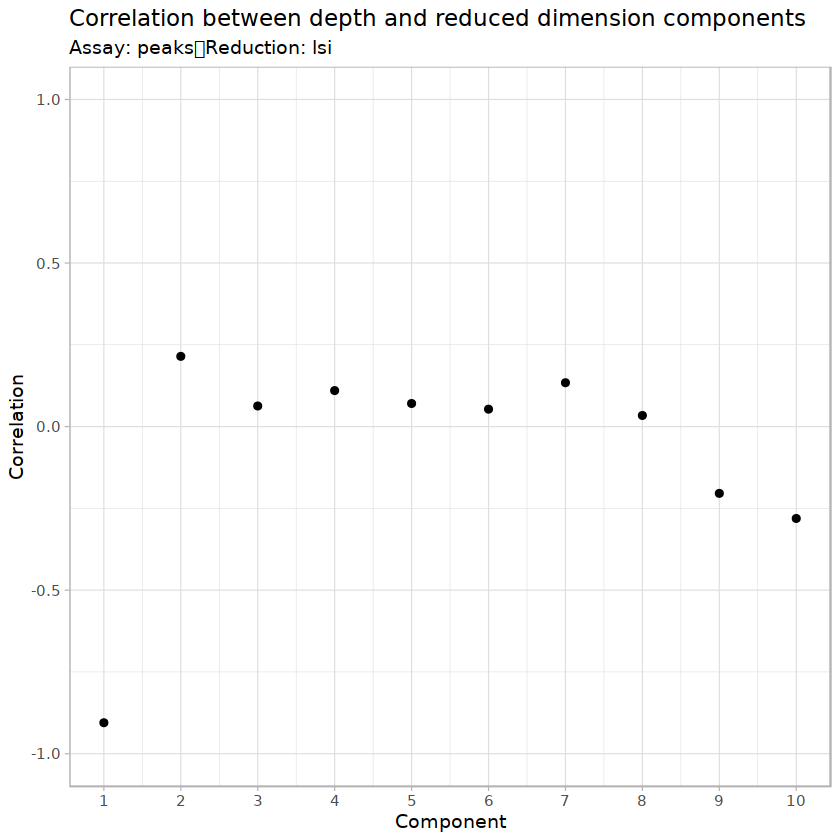

In [10]:
DepthCor(atac)

In [11]:
embedding = Embeddings(atac[['lsi']])[,2:30] #remove first component

In [12]:
write.csv(embedding, file = 'embedding.csv')

In [13]:
atac <- RunUMAP(object = atac, reduction = 'lsi', dims = 2:30)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
15:43:05 UMAP embedding parameters a = 0.9922 b = 1.112

15:43:05 Read 63882 rows and found 29 numeric columns

15:43:05 Using Annoy for neighbor search, n_neighbors = 30

15:43:05 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:43:11 Writing NN index file to temp file /tmp/Rtmp43ltza/file747769a0c157

15:43:11 Searching Annoy index using 1 thread, search_k = 3000

15:43:34 Annoy recall = 100%

15:43:35 Commencing smooth kNN distance calibration using 1 thread

15:43:38 Initializing fr

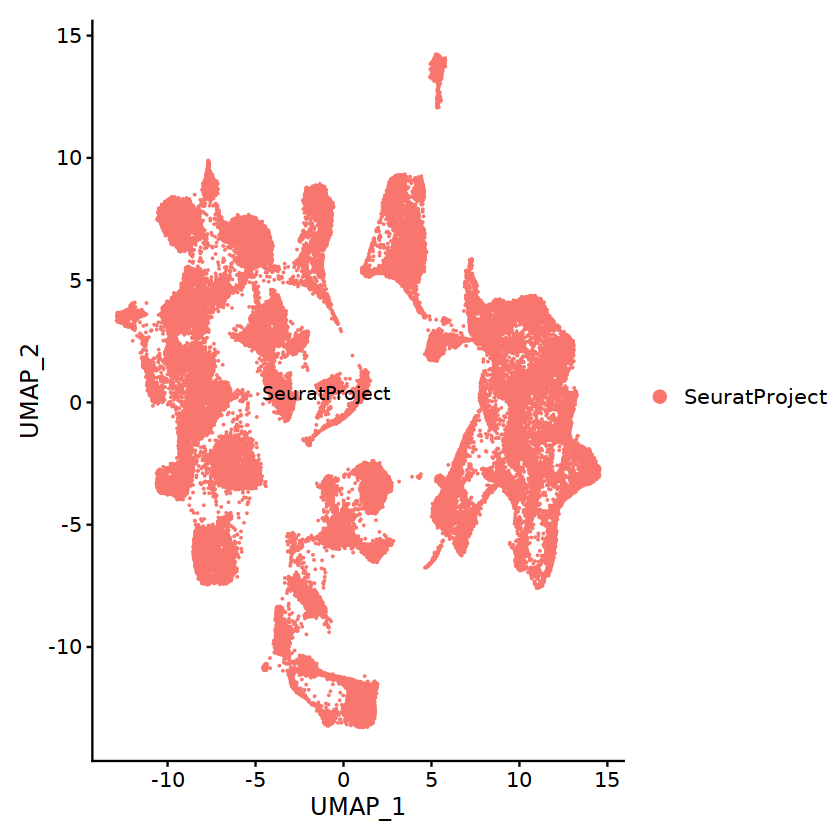

In [14]:
DimPlot(object = atac, label = TRUE) 